# Additional Functions

## Identifying "single-gene" iModulons
Some iModulons are dominated by a single, high-coefficient gene. These iModulons may result from:

1. Overdecomposition of the dataset to identify noisy genes
2. Artificial knock-out of single genes
3. Regulons with only one target gene

No matter what causes these iModulons, it is important to be aware of them. The ``find_single_gene_imodulons`` function identifies iModulons that are likely dominated by a single gene.

The iModulons identified by ``find_single_gene_imodulons`` may contain more than one gene, since a threshold-agnostic method is used to identify these iModulons.

In [1]:
from pymodulon.example_data import load_ecoli_data
ica_data = load_ecoli_data()

In [3]:
from pymodulon.plotting import *

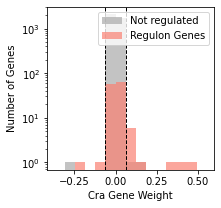

In [5]:
fig,ax= plt.subplots(figsize=(3,3))
plot_regulon_histogram(ica_data,'Cra',ax=ax);

In [2]:
ica_data.find_single_gene_imodulons()

['Pyruvate', 'fur-KO', 'sgrT', 'thrA-KO', 'ydcI-KO']

Single-gene iModulons can be automatically saved in the iModulon table.

In [3]:
ica_data.find_single_gene_imodulons()
ica_data.imodulon_table.loc[['fur-KO']]

,regulator,f1score,pvalue,precision,recall,TP,n_genes,n_tf,Category,threshold
fur-KO,None,NaN,NaN,NaN,NaN,NaN,13,0,Genomic Alterations,0.078193


## Explained variance
To compute the total amount of expression variation explained by iModulons, use the ``explained_variance`` function.

In [4]:
from pymodulon.util import explained_variance

In [5]:
explained_variance(ica_data)

0.6946207831724599

Explained variance can be computed for individual genes, samples, or iModulons

In [6]:
print('iModulons explain {:.0f}% of the expression variation in thrA'.format(explained_variance(ica_data,genes='thrA')*100))
print('The RpoH iModulon explains {:.0f}% of the expression variation in the dnaKJ transcription unit'.format(explained_variance(ica_data,imodulons=['RpoH'],genes=['dnaK','dnaJ'])*100))
print('iModulons explain {:.0f}% of the expression variation induced by iron starvation'.format(explained_variance(ica_data,samples=['fur__wt_dpd__1','fur__wt_dpd__2'])*100))
print('The RpoS iModulon explains {:.1f}% of the global expression variation'.format(explained_variance(ica_data,imodulons=['RpoS'])*100))

iModulons explain 93% of the expression variation in thrA
The RpoH iModulon explains 69% of the expression variation in the dnaKJ transcription unit
iModulons explain 70% of the expression variation induced by iron starvation
The RpoS iModulon explains 4.3% of the global expression variation


The following code shows how to identify iModulons that explain the largest fraction of variance in the dataset. These iModulons tend to represent the effects of global regulators.

In [7]:
import pandas as pd

rec_var = {}
for k in ica_data.imodulon_names:
    rec_var[k] = explained_variance(ica_data,imodulons=k)
df_rec_var = pd.Series(rec_var)
df_rec_var = df_rec_var.sort_values(ascending=False)
df_rec_var.head(10)

RpoS                 0.043242
FlhDC                0.042180
Fnr                  0.034855
FliA                 0.034259
uncharacterized-5    0.032859
Fur-1                0.020544
Crp-1                0.018618
ArcA-1               0.017906
PurR-2               0.017560
NtrC+RpoN            0.016785
dtype: float64

In [8]:
import matplotlib.pyplot as plt

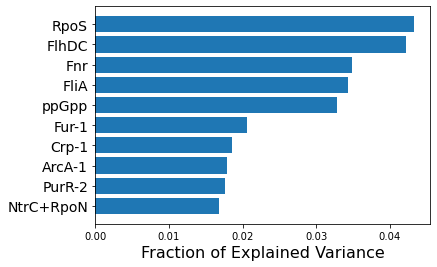

In [9]:
plt.barh(range(10,0,-1),df_rec_var.head(10),tick_label = df_rec_var.head(10).index)
plt.xlabel('Fraction of Explained Variance',fontsize=16)
# Rename uncharacterized-5 to ppGpp
new_labels = [x if x != 'uncharacterized-5' else 'ppGpp' for x in df_rec_var.head(10).index]
plt.yticks(range(10,0,-1),labels=new_labels,fontsize=14);

### Plotting Explained Variance

In [10]:
from pymodulon.plotting import plot_explained_variance

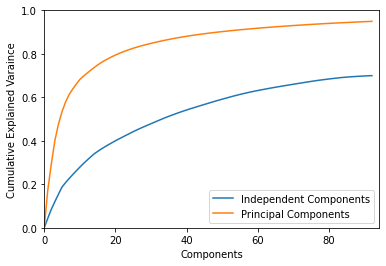

In [12]:
plot_explained_variance(ica_data, pc=True);